In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/dataset/test.csv')

In [ ]:
train_data.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [ ]:
test_data.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

In [ ]:
train_data['TARGET(PRICE_IN_LACS)'].value_counts()

110.0     795
100.0     770
120.0     652
130.0     598
45.0      583
         ... 
96.6        1
95.6        1
8660.0      1
94.3        1
78.2        1
Name: TARGET(PRICE_IN_LACS), Length: 1172, dtype: int64

In [ ]:
# Remove the price outliers
train_data = train_data.sort_values('TARGET(PRICE_IN_LACS)',ascending=False).iloc[884:] 
train_data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,28567.000000,28567.000000,28567.000000,2.856700e+04,28567.000000,28567.000000,28567.000000,28567.000000,28567.000000
mean,0.179298,0.315924,2.353450,1.542744e+03,0.820702,0.933875,21.348115,76.926668,81.959182
std,0.383608,0.464891,0.825286,2.666530e+04,0.383608,0.248505,6.240020,10.457439,69.031482
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,8.908686e+02,1.000000,1.000000,18.438476,73.847780,37.000000
50%,0.000000,0.000000,2.000000,1.156154e+03,1.000000,1.000000,21.071623,77.338956,60.000000
75%,0.000000,1.000000,3.000000,1.505131e+03,1.000000,1.000000,26.900926,78.020000,100.000000
max,1.000000,1.000000,20.000000,4.300000e+06,1.000000,1.000000,59.912884,152.962676,420.000000


In [ ]:
# Cleaning the sqaure_ft outliers
train_data = train_data.sort_values('SQUARE_FT',ascending=False).iloc[852:]
train_data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,27715.000000,27715.000000,27715.000000,27715.000000,27715.000000,27715.000000,27715.000000,27715.000000,27715.000000
mean,0.180263,0.315136,2.304673,1197.120600,0.819737,0.934187,21.309430,76.924631,77.612777
std,0.384414,0.464578,0.749139,465.185990,0.384414,0.247959,6.208328,10.452539,62.884893
min,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,876.111989,1.000000,1.000000,18.441921,73.823649,36.000000
50%,0.000000,0.000000,2.000000,1149.131767,1.000000,1.000000,21.000000,77.338956,59.000000
75%,0.000000,1.000000,3.000000,1470.155837,1.000000,1.000000,26.900926,78.067294,95.000000
max,1.000000,1.000000,20.000000,2713.090662,1.000000,1.000000,59.912884,152.962676,420.000000


In [ ]:
# Turning into a binary variable
train_data['BHK_OR_RK'] = train_data['BHK_OR_RK'].replace(to_replace=['BHK', 'RK'], value=[1, 0])   

In [ ]:
train_data['POSTED_BY'] = train_data['POSTED_BY'].replace(to_replace=['Owner', 'Dealer','Builder'], value=[0, 1, 2]) 
test_data['POSTED_BY'] = test_data['POSTED_BY'].replace(to_replace=['Owner', 'Dealer','Builder'], value=[0, 1, 2])   

In [ ]:
train_data.drop(['ADDRESS'], axis = 1, inplace = True)
test_data.drop(['ADDRESS'], axis = 1, inplace = True)

In [ ]:
train_data.drop(['BHK_OR_RK'], axis = 1, inplace = True)
test_data.drop(['BHK_OR_RK'], axis = 1, inplace = True)

In [ ]:
train_data.drop(['READY_TO_MOVE'], axis = 1, inplace = True)
test_data.drop(['READY_TO_MOVE'], axis = 1, inplace = True)

In [ ]:
X_train = train_data.drop('TARGET(PRICE_IN_LACS)',axis=1).values
Y_train = train_data['TARGET(PRICE_IN_LACS)'].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.layers import Dropout

In [ ]:
model_price = Sequential()

# Number of neurons equal to te feautres on the dataset
model_price.add(Dense(8,activation='relu',input_shape=(8,)))
model_price.add(Dropout(0.5))
model_price.add(Dense(8,activation='relu'))
model_price.add(Dropout(0.5))
model_price.add(Dense(8,activation='relu'))
model_price.add(Dropout(0.5))
model_price.add(Dense(8,activation='relu'))
model_price.add(Dropout(0.5))
model_price.add(Dense(1, activation = 'linear'))

model_price.compile(optimizer='adam',loss='mae')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
cb = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model_price.fit(x=X_train,y=Y_train, validation_data=(X_test, Y_test), batch_size=128, epochs=100, callbacks=[cb])
# batch_size in power of two

Epoch 1/100
195/195 [==============================] - 1s 3ms/step - loss: 71.9649 - val_loss: 51.3576
Epoch 2/100
195/195 [==============================] - 0s 2ms/step - loss: 58.0875 - val_loss: 46.5238
Epoch 3/100
195/195 [==============================] - 0s 2ms/step - loss: 55.0900 - val_loss: 45.5354
Epoch 4/100
195/195 [==============================] - 0s 2ms/step - loss: 52.1721 - val_loss: 44.1256
Epoch 5/100
195/195 [==============================] - 0s 2ms/step - loss: 50.6281 - val_loss: 41.2960
Epoch 6/100
195/195 [==============================] - 0s 2ms/step - loss: 49.0179 - val_loss: 40.0772
Epoch 7/100
195/195 [==============================] - 0s 2ms/step - loss: 47.9850 - val_loss: 38.8290
Epoch 8/100
195/195 [==============================] - 0s 2ms/step - loss: 47.4263 - val_loss: 38.1901
Epoch 9/100
195/195 [==============================] - 0s 2ms/step - loss: 46.6223 - val_loss: 38.0407
Epoch 10/100
195/195 [==============================] - 0s 2ms/step - los

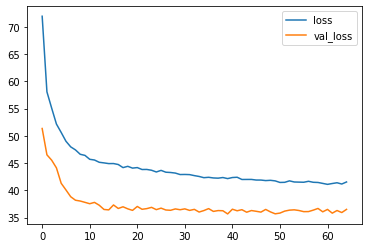

In [ ]:
losses = pd.DataFrame(model_price.history.history)
losses.plot()

In [ ]:
from sklearn.metrics import mean_absolute_error, max_error, mean_squared_error

In [ ]:
y_pred = model_price.predict(X_test).reshape(X_test.shape[0])

# Create a dataframe to put the two columns of the true value and the prediction
pred_df = pd.DataFrame({'Actual value':Y_test, 'Predicted value':y_pred})
print(pred_df.head())

   Actual value  Predicted value
0          85.0        62.755238
1          47.0        42.899002
2          43.0        42.899002
3          24.0        42.899002
4          30.0        42.899002


In [ ]:
mean_absolute_error(y_true=pred_df['Actual value'], y_pred=pred_df['Predicted value'])

36.50715257955664